<a href="https://colab.research.google.com/github/laurabrin/EDALabs/blob/main/Eda_Lab_1__LBrin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Lab 1: Data Exploration & Visualization

##### In this lab, we will be going over some basic data analysis techniques like feature selection, finding the correlation between different features and visualizing our data to understand it better.


##### Domain knowledge: The lab does not require any domain knowledge of basketball or what the column names stand for. In fact, it assumes you do not have any knowledge about basketball stats. However, you will see how domain knowledge helps as you progress forward.

Outcomes: 
- Find “interesting” features about data from looking at tables and statistics about the data.
- Describe how visualization can be used as a data exploration tool and for verification purposes.
- Create some useful types of visualization

#### Importing libraries and loading data

The data for this lab can be downloaded from here: https://www.kaggle.com/rikdifos/2018-2019-nba-champion-toronto-raptors-analysis/data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##
#Loading playoffs data

df = pd.read_csv("/content/raptors_regulars.csv") #upload to session storage

#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

##### Observing data

In [7]:
df.head(7)

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,TOR,01/13/2019,TOR @ WAS,W,290,140,49,104,47.1,13,36,36.1,29,36,80.6,17,42,59,24,16,8,21,27,2
1,TOR,11/29/2018,TOR vs. GSW,W,265,131,47,90,52.2,15,38,39.5,22,24,91.7,7,30,37,25,5,6,14,23,3
2,TOR,02/13/2019,TOR vs. WAS,W,241,129,44,92,47.8,16,38,42.1,25,30,83.3,9,43,52,32,8,8,14,27,9
3,TOR,10/30/2018,TOR vs. PHI,W,240,129,47,92,51.1,11,27,40.7,24,28,85.7,9,34,43,29,13,6,15,26,17
4,TOR,03/18/2019,TOR vs. NYK,W,240,128,49,88,55.7,17,40,42.5,13,22,59.1,5,45,50,36,5,6,14,22,36
5,TOR,11/10/2018,TOR vs. NYK,W,239,128,42,79,53.2,14,35,40.0,30,40,75.0,12,34,46,24,8,4,15,20,16
6,TOR,03/08/2019,TOR @ NOP,W,240,127,53,99,53.5,13,37,35.1,8,9,88.9,7,44,51,31,10,12,16,14,23


In [8]:
df.shape

(82, 24)

##### Checking data type for each column

In [9]:
df.dtypes

TEAM        object
DATE        object
MATCHUP     object
W/L         object
MIN          int64
PTS          int64
FGM          int64
FGA          int64
FG%        float64
3PM          int64
3PA          int64
3P%        float64
FTM          int64
FTA          int64
FT%        float64
OREB         int64
DREB         int64
REB          int64
AST          int64
STL          int64
BLK          int64
TOV          int64
PF           int64
+/-          int64
dtype: object

### Lab Activity 1: Data Preprocessing

##### [Q] The `'W/L'` column tells us whether the team won or lost the game. However, since the `'W/L'` column is in `text(object)` format, we cannot perform proper statistical analysis. Thus, we need to change it, so $1$ represents a win and $0$ represents a loss.

In [10]:
#Hint: Changing the values of the column does not change the data type. You need to alter both, the values and the data type the column represents


In [74]:
df["W/L"].replace({"W":1,"L":0},inplace=True)
df["W/L"]=df["W/L"].astype("int64")

##### [Q] Check the data types again.

In [75]:
df.dtypes

TEAM        object
DATE        object
MATCHUP     object
W/L          int64
MIN          int64
PTS          int64
FGM          int64
FGA          int64
FG%        float64
3PM          int64
3PA          int64
3P%        float64
FTM          int64
FTA          int64
FT%        float64
OREB         int64
DREB         int64
REB          int64
AST          int64
STL          int64
BLK          int64
TOV          int64
PF           int64
+/-          int64
dtype: object

##### [Q] Convert `'DATE'` column to [`datetime` format](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

In [76]:
df["DATE"]=pd.to_datetime(df["DATE"])



##### [Q] Add a column `'DELTA'` with the delta time in days. That is, the number of days between matches.

In [77]:
df=df.sort_values("DATE") #dont forget to apply back to df or sort will not be saved
df["DELTA"]=df["DATE"].diff()
df.head(7)

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,DELTA
43,TOR,2018-10-17,TOR vs. CLE,1,239,116,45,92,48.9,14,33,42.4,12,20,60.0,8,35,43,21,6,7,9,29,12,NaT
49,TOR,2018-10-19,TOR vs. BOS,1,239,113,43,92,46.7,13,35,37.1,14,19,73.7,12,37,49,24,3,3,12,19,12,2 days
40,TOR,2018-10-20,TOR @ WAS,1,240,117,39,88,44.3,10,29,34.5,29,36,80.6,14,38,52,21,5,5,17,29,4,1 days
8,TOR,2018-10-22,TOR vs. CHA,1,241,127,50,87,57.5,15,39,38.5,12,14,85.7,5,41,46,36,10,8,13,21,21,2 days
51,TOR,2018-10-24,TOR vs. MIN,1,239,112,46,89,51.7,11,32,34.4,9,12,75.0,11,33,44,26,9,8,16,18,7,2 days
42,TOR,2018-10-26,TOR vs. DAL,1,239,116,44,91,48.4,11,27,40.7,17,20,85.0,12,38,50,23,10,5,12,22,9,2 days
57,TOR,2018-10-29,TOR @ MIL,0,239,109,39,103,37.9,9,45,20.0,22,28,78.6,15,36,51,25,9,7,10,19,-15,3 days


This dataset is now preprocessed and in a correct format.

### Lab Activity Two: Statistical Analysis & Visualizations

##### [Q] Scatter plots are a useful method to observe relationships between variables. Plot a scatter plot of `'FGM'` (Y-axis) vs `'PTS'` (X-axis).

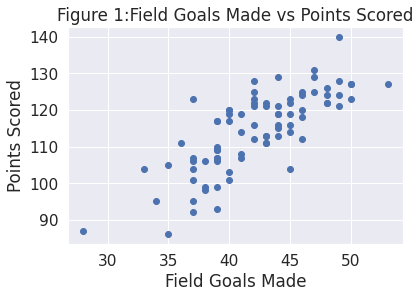

In [78]:
fig1=plt.scatter(df["FGM"],df["PTS"])
plt.xlabel("Field Goals Made")
plt.ylabel("Points Scored")
plt.title("Figure 1:Field Goals Made vs Points Scored")
plt.show()

##### [Q] Describe the relationship between Field Goals Made (`'FGM'`) and Points Scored (`'PTS'`). What can you observe? 

##### [Q] Let's observe the [correlation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) between each column

In [88]:
corr=df.corr()
corr


,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
W/L,1.000000,-0.075488,0.575034,0.432612,-0.035753,0.386880,0.276205,0.000122,0.303570,0.212808,0.232450,-0.047695,-0.074823,0.340098,0.216745,0.376716,0.331385,0.107905,-0.103160,0.065232,0.775046
MIN,-0.075488,1.000000,0.205407,0.047877,0.209642,-0.092809,0.038488,0.114129,-0.034957,0.281027,0.232236,0.105981,0.062474,0.137884,0.152323,-0.045692,0.177722,0.050830,0.208603,0.208197,-0.118805
PTS,0.575034,0.205407,1.000000,0.772660,0.011150,0.671907,0.446822,0.083493,0.482326,0.358861,0.334081,0.122893,-0.122107,0.329554,0.175580,0.554875,0.192245,0.023599,0.045593,0.306924,0.638127
FGM,0.432612,0.047877,0.772660,1.000000,0.160288,0.769739,0.123228,-0.099486,0.197949,-0.218892,-0.217540,0.044170,-0.173898,0.367641,0.169707,0.566493,0.196000,0.059442,0.080031,0.118434,0.601160
FGA,-0.035753,0.209642,0.011150,0.160288,1.000000,-0.501263,-0.208453,0.247240,-0.408065,-0.102261,-0.116602,0.016916,0.614249,0.157469,0.550958,0.055739,0.214096,-0.081499,-0.250715,0.043296,-0.021792
FG%,0.386880,-0.092809,0.671907,0.769739,-0.501263,1.000000,0.250006,-0.239107,0.443555,-0.121820,-0.109766,0.028788,-0.539124,0.200536,-0.215938,0.457366,0.025679,0.110491,0.226131,0.067450,0.525421
3PM,0.276205,0.038488,0.446822,0.123228,-0.208453,0.250006,1.000000,0.578110,0.848788,0.013550,0.014242,0.018406,-0.246400,0.164125,-0.041433,0.485640,-0.065338,0.109966,0.037753,0.175792,0.425918
3PA,0.000122,0.114129,0.083493,-0.099486,0.247240,-0.239107,0.578110,1.000000,0.080137,-0.047243,-0.042216,0.000861,0.079981,0.202491,0.215524,0.247257,-0.014395,0.103191,-0.047442,0.138836,0.100102
3P%,0.303570,-0.034957,0.482326,0.197949,-0.408065,0.443555,0.848788,0.080137,1.000000,0.055455,0.041181,0.064172,-0.343140,0.054216,-0.195448,0.418060,-0.082851,0.073525,0.072501,0.129210,0.409729
FTM,0.212808,0.281027,0.358861,-0.218892,-0.102261,-0.121820,0.013550,-0.047243,0.055455,1.000000,0.951583,0.146584,0.200149,-0.069903,0.083759,-0.164812,0.088067,-0.117939,-0.064864,0.272877,-0.028239


##### [Q] A heatmap is a great way to visualize the correlations. Plot a heatmap using the [seaborn]((https://seaborn.pydata.org/generated/seaborn.heatmap.html)) library. Note: You may need to install seaborn using 'pip install seaborn' on the anaconda prompt interface.

[Text(0.5, 1.0, 'Figure 2: Heatmap of Correlation')]

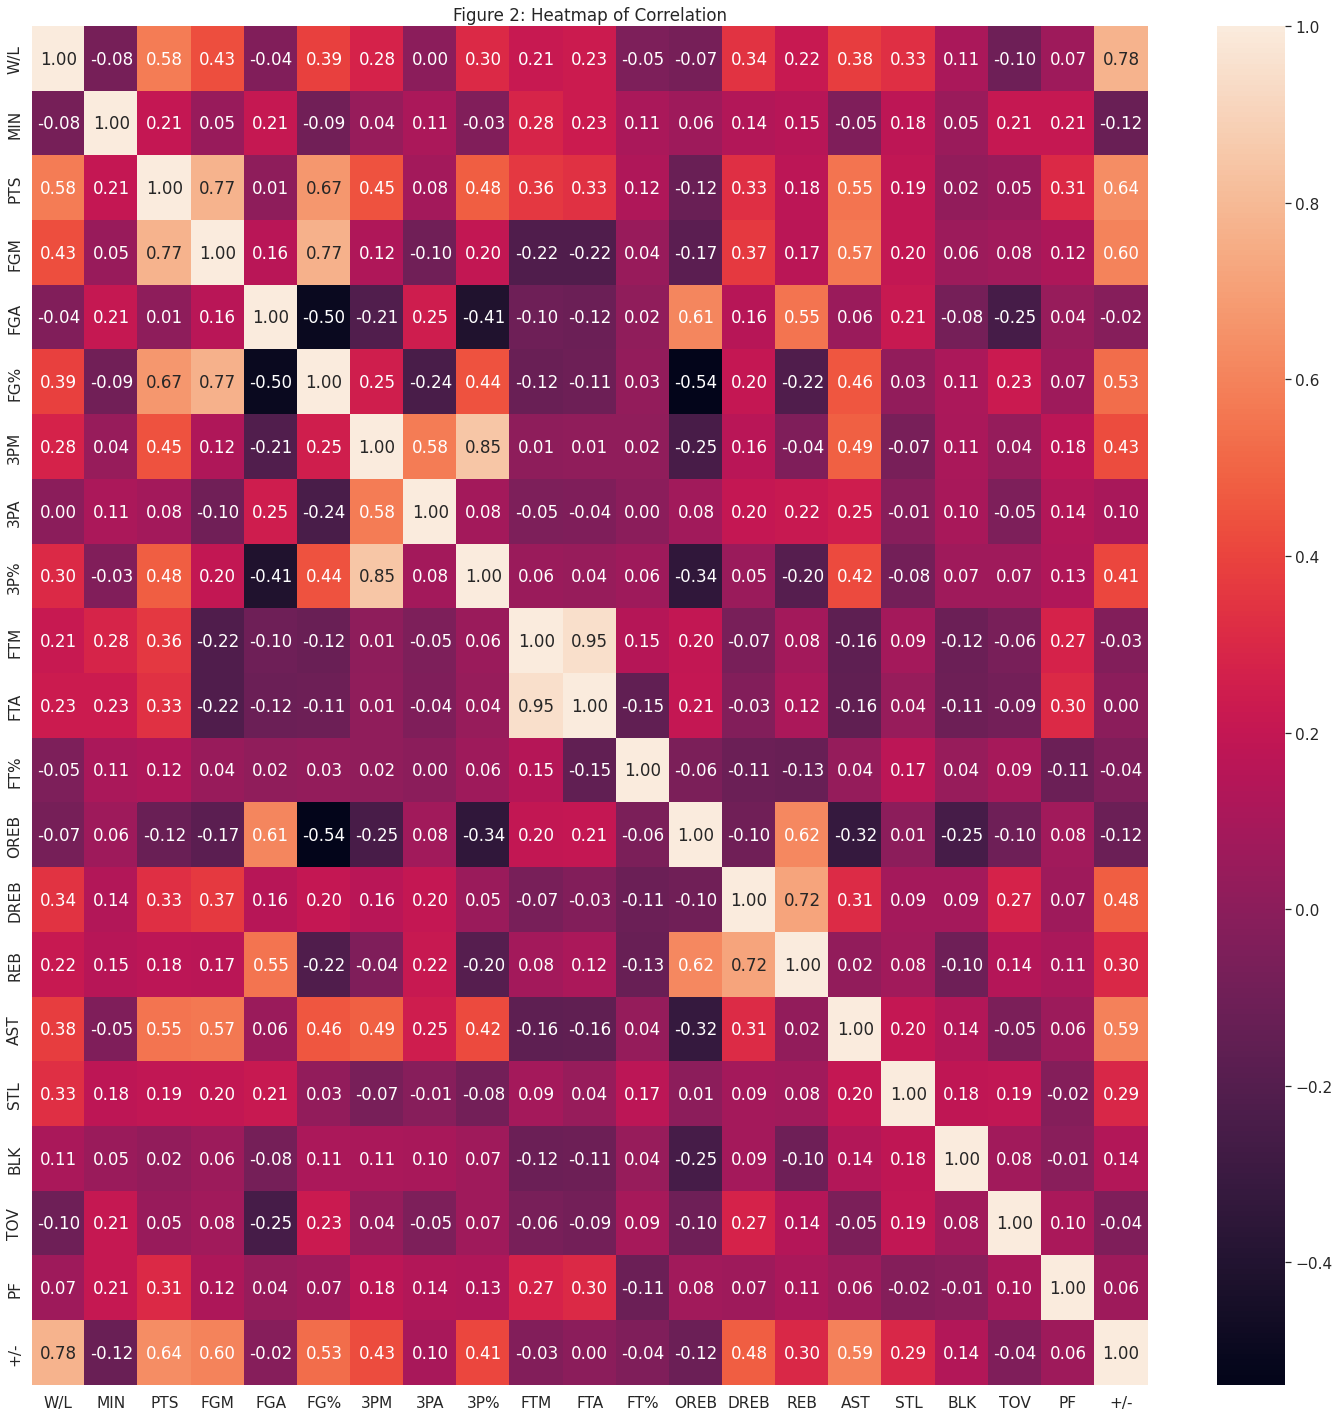

In [115]:
fig2=plt.figure(num=None, figsize=(25, 25)) 
fig2=sns.heatmap(data=corr,annot=True, fmt='.2f').set(title= "Figure 2: Heatmap of Correlation")
sns.set(font_scale=1.4)
fig2

##### [Q] Naturally, we should first try to observe what game stats (features) help the team towards a victory or a loss ($1$ or $0$ in the `'W/L'` column). Order the correlations dataframe by the `'W/L'` column.


In [95]:
#Sort by descending values and display/view the sorted table
corr.sort_values("W/L", axis=0)

,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
TOV,-0.103160,0.208603,0.045593,0.080031,-0.250715,0.226131,0.037753,-0.047442,0.072501,-0.064864,-0.085957,0.094666,-0.103379,0.272679,0.143649,-0.053276,0.189536,0.080011,1.000000,0.104269,-0.042890
MIN,-0.075488,1.000000,0.205407,0.047877,0.209642,-0.092809,0.038488,0.114129,-0.034957,0.281027,0.232236,0.105981,0.062474,0.137884,0.152323,-0.045692,0.177722,0.050830,0.208603,0.208197,-0.118805
OREB,-0.074823,0.062474,-0.122107,-0.173898,0.614249,-0.539124,-0.246400,0.079981,-0.343140,0.200149,0.205335,-0.055149,1.000000,-0.097001,0.617780,-0.318082,0.007103,-0.252525,-0.103379,0.078797,-0.116633
FT%,-0.047695,0.105981,0.122893,0.044170,0.016916,0.028788,0.018406,0.000861,0.064172,0.146584,-0.152831,1.000000,-0.055149,-0.113645,-0.128085,0.036187,0.172414,0.042872,0.094666,-0.112783,-0.043511
FGA,-0.035753,0.209642,0.011150,0.160288,1.000000,-0.501263,-0.208453,0.247240,-0.408065,-0.102261,-0.116602,0.016916,0.614249,0.157469,0.550958,0.055739,0.214096,-0.081499,-0.250715,0.043296,-0.021792
3PA,0.000122,0.114129,0.083493,-0.099486,0.247240,-0.239107,0.578110,1.000000,0.080137,-0.047243,-0.042216,0.000861,0.079981,0.202491,0.215524,0.247257,-0.014395,0.103191,-0.047442,0.138836,0.100102
PF,0.065232,0.208197,0.306924,0.118434,0.043296,0.067450,0.175792,0.138836,0.129210,0.272877,0.304918,-0.112783,0.078797,0.065060,0.106121,0.058118,-0.023656,-0.009641,0.104269,1.000000,0.062628
BLK,0.107905,0.050830,0.023599,0.059442,-0.081499,0.110491,0.109966,0.103191,0.073525,-0.117939,-0.111544,0.042872,-0.252525,0.089463,-0.104675,0.136542,0.183933,1.000000,0.080011,-0.009641,0.140216
FTM,0.212808,0.281027,0.358861,-0.218892,-0.102261,-0.121820,0.013550,-0.047243,0.055455,1.000000,0.951583,0.146584,0.200149,-0.069903,0.083759,-0.164812,0.088067,-0.117939,-0.064864,0.272877,-0.028239
REB,0.216745,0.152323,0.175580,0.169707,0.550958,-0.215938,-0.041433,0.215524,-0.195448,0.083759,0.115900,-0.128085,0.617780,0.722717,1.000000,0.023773,0.075880,-0.104675,0.143649,0.106121,0.296742


##### Let's now take a look at the features closely and their definitions.

`MIN`: Minutes played

`PTS`: Points scored by the team

`FGM`: Field goals made (shots taken that went in the basket, 3-pointers not included)

`FGA`: Field goals attempt (total shots taken, 3-pointers not included)

`FG%`: FGM divided by FGA

`3PM`: Three pointers made (3 pointers that went in)

`3PA`: Three pointers attempted (total three point shots taken)

`3P%`: 3PM/3PA

`FTM`: Free throws made

`FTA`: Free throws attempted

`FT%`: FTM/FTA

`OREB`: Offensive rebound (The team shoots the ball, does not get it 
in but is able to rebound the ball back)

`DREB`: Defensive rebound (The OTHER teams shoots the ball, does not get it in and OUR team is able to rebound the ball)

`REB`: total rebounds (OREB+DREB)

`AST`: Assists

`STL`: Steals

`BLK`: Blocks

`TOV`: Turnovers (how many times the team lost the ball)

`PF`: Personal Fouls

`+/-`: Can be ignored

#### Now that you have definitions of the features, go back and observe the sorted correlations table. 

- The `'TOV'` feature is negatively correlated, which makes sense given by definition, the more times a team loses the ball, the lower the chance of them winning the game.

- The `'PTS'` feature is positively correlated; the more points the team scored, the higher the chance of winning.

- Interestingly, the number of three point attempts made (`'3PA'`) has the least effect on the game's outcome (correlation close to $0$).

Continuing your observation of correlations between the features and the W/L column, the correlations statistics start to make sense. 

**Domain knowledge:** This is where domain knowledge comes into use. Having the background information of the dataset you are working with can significantly help in data analysis and machine learning tasks. The knowledge level required can vary depending on the challenge being solved; From intermediate (this lab) to advanced (Disease detection in chest x-rays using AI). It is always a good idea to go out of your way to gain knowledge in the domain you are working in and understand the data being used.

#### More Visualizations

##### [Q] Going back to our original dataframe (not the correlations `df`), plot a histogram of the points scored (`'PTS'` column). 

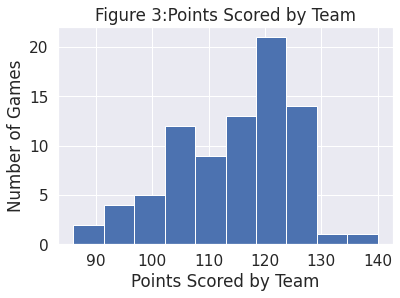

In [100]:
# Hint: Don't set a specific bin value for this visualization, let matplotlib determine it automatically. Though this isn't always the case.
# Tip: Increase the font-size of your labels for a clearer view. 
fig3=plt.hist(df["PTS"])
plt.xlabel("Points Scored by Team")
plt.ylabel("Number of Games")
plt.title("Figure 3:Points Scored by Team")
plt.show()


##### [Q] What is the value of the points scored in a game that occur the most?

##### [Q] Now plot a simple line graph of the points scored (`'PTS'` column) over time.

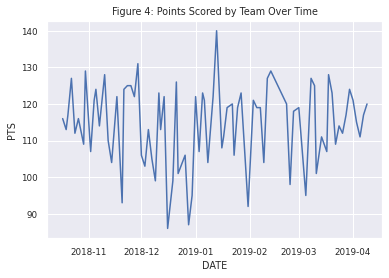

In [112]:
sns.lineplot(data=df, y="PTS", x="DATE").set(title="Figure 4: Points Scored by Team Over Time")
sns.set(font_scale=0.8)